In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/MyDrive/Programowanie/SpotifyPredicterRefactored")

In [35]:
# import matplotlib.pyplot as plt
# import nltk
# import pandas as pd
import seaborn as sns
# import string
from joblib import dump, load
# from keras.layers import Dense
# from keras.models import Sequential
# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
# from sklearn.linear_model import RidgeCV
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import OrdinalEncoder, StandardScaler
# from tqdm import tqdm


In [28]:
from songs_spotify import load_artists, load_spotify_songs, load_joined_songs, get_Xy

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
import pandas as pd
df_sample = pd.read_csv("data/spotify_songs.csv.gz").sample(1000)
df_sample

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
7614,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,Van Morrison,79,7dsWupQRlFuhG8FGiQAUjC,Blowin' Your Mind!,1967-09,Southern Soul BBQ Mix,3nTS97zUqxJBQeiXNRs963,rap,...,7,-10.964,1,0.0376,0.18200,0.000000,0.4070,0.9070,150.572,183307
30979,7xrA11O07xo57Bbg6p4hck,Body Say,Demi Lovato,63,7eh0AAzV329H8VmPnjlSXF,Body Say,2016-07-01,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,5,-4.836,0,0.0358,0.00415,0.000000,0.2770,0.2570,86.983,193893
29474,32iD965RO5haquFAlq5jhz,Lifting You Higher (ASOT 900 Anthem) - Blaster...,Armin van Buuren,44,2kVKXpGBQ6tqbwbqRXDf6A,Lifting You Higher (ASOT 900 Anthem) [Blasterj...,2019-02-22,Big Room 2019,6SrHyxIxWfQx9ISEr6yowk,edm,...,9,-5.965,1,0.0453,0.00215,0.842000,0.3120,0.0999,130.031,187798
23362,7FrJV8tydWEv1Mxu2mIQrm,Beautiful,Snoop Dogg,60,7F9hfZKh6WLOKME4LwCPZI,Paid Tha Cost To Be Da Bo$$,2002-01-01,90s/00s Hip Hop & RnB,0Ar0Ng9DlAWZtSPBvOQgOa,r&b,...,11,-6.268,0,0.1350,0.24600,0.000000,0.0808,0.9610,101.007,298307
26926,1vTDaihmFxX2vIoraUYwkT,Thunder,Jauz,44,6Ef6gR5LQOUwrzEfb0PjOr,Thunder,2019-08-16,Nasty Bits,37i9dQZF1DX2VvACCrgjrt,edm,...,11,-3.169,1,0.1570,0.03730,0.122000,0.1860,0.3620,130.028,236888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,48hCRC8SFqLDsm11he63Rr,Holding Up - Radio Edit,Jabberwocky,43,0mFykuiN1fIZubte02PyRI,Holding Up (Radio Edit),2015-03-13,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,7,-6.189,0,0.0388,0.11800,0.000000,0.4410,0.4310,94.025,202535
21580,10kkgS1Ua4pgXORO8dUtDL,Let You Down Let You Go,Jozzy,11,7qPiHoVoT3Pm50AklGFHDS,Let You Down Let You Go,2020-01-17,New R&B‏‏​​ ‍,4I6rTSxqKl1LRvES2O9owQ,r&b,...,0,-9.034,0,0.0371,0.25000,0.000013,0.1140,0.6970,125.114,199872
24420,6m59VvDUi0UQsB2eZ9wVbH,Poison,Bell Biv DeVoe,66,6H5mxGUWguDjtQ4Uzd8veD,Poison,1990-01-01,New Jack City,6RLvj5OnEuPzI1P02KwnzK,r&b,...,6,-10.530,0,0.2100,0.00195,0.004170,0.6330,0.7750,111.815,261853
12366,0eFvoRSTTaR2q8bSWVjwfp,Welcome To The Jungle,Guns N' Roses,14,4a92B7gXZWKJopxs6gWgqb,Greatest Hits,2004-01-01,Rock Classics,37i9dQZF1DWXRqgorJj26U,rock,...,10,-4.869,0,0.1120,0.03010,0.499000,0.3130,0.3270,123.411,271867


# Przygotowanie danych

In [77]:
df_sample.to_csv("data/new_songs.csv.gz")


## Artists last_fm

In [23]:
# load last fm data
artists = load_artists()

artists

,artist_mb,country_mb
0,coldplay,United Kingdom
1,radiohead,United Kingdom
2,red hot chili peppers,United States
3,rihanna,United States
4,eminem,United States
...,...,...
1466078,정은지,South Korea
1466079,남태현,South Korea
1466080,헤일로,South Korea
1466081,서현진,South Korea


## Spotify songs

In [79]:
# load spotify data
spotify_songs = load_spotify_songs("data/new_songs_processed.csv.gz")

spotify_songs = spotify_songs.drop(columns = 'Unnamed: 0')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


##Join sets

In [80]:
songs_joined = load_joined_songs(spotify_songs, artists)
X, y = get_Xy(songs_joined)


##random boosting (best score)

In [86]:
gbmodel_path = "models/gb_model.joblib"
# os.makedirs(os.path.dirname(gbmodel_path), exist_ok = True)
# dump(gb_model, gbmodel_path)
gbmodel = load(gbmodel_path)
y_pred = gbmodel.predict(X)

(     track_album_release_year  track_album_release_month  danceability  \
 0                    0.368723                   0.299467     -0.096802   
 1                    0.928541                  -1.042599     -0.637984   
 2                   -2.243761                  -1.311013      1.700697   
 3                    0.928541                   0.567880     -0.580001   
 4                    0.555329                   0.567880     -1.597939   
 ..                        ...                        ...           ...   
 868                  0.928541                  -1.042599     -0.786165   
 869                 -0.937519                   0.567880      1.765123   
 870                 -0.191095                   1.641533      0.064264   
 871                  0.182117                  -0.774186      0.115805   
 872                  0.182117                  -0.774186      0.115805   
 
        energy       key  loudness      mode  speechiness  acousticness  \
 0    0.189848 -0.08188

In [82]:
gbmodel.score(X, y)

0.26240817194048927

<Axes: xlabel='track_popularity'>

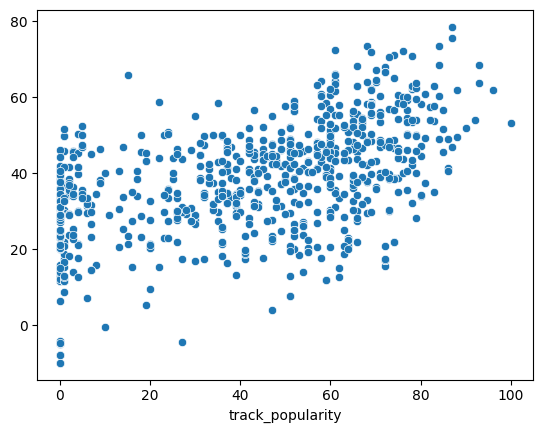

In [83]:
sns.scatterplot(x=y, y=y_pred)

In [37]:
X

,track_album_release_year,track_album_release_month,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_name,playlist_genre,playlist_subgenre,country_mb
0,0.978631,-0.054842,0.873849,1.057438,0.085305,1.466333,0.836811,-0.414655,-0.325742,-0.377223,-0.872048,0.150304,-0.009714,-0.571240,291.0,2.0,3.0,97.0
1,0.978631,1.446084,0.722421,0.500748,1.503243,0.560201,0.836811,-0.647115,-0.452548,-0.356755,1.177867,0.936790,-0.878806,-1.164272,291.0,2.0,3.0,98.0
2,0.978631,0.195312,0.371382,1.140114,-1.332634,1.156657,-1.195013,-0.238649,-0.422560,-0.377109,-0.557920,0.577254,0.067962,-0.905768,291.0,2.0,3.0,91.0
3,0.978631,0.195312,0.667356,1.134603,0.368892,1.022387,0.836811,0.069085,-0.639759,-0.377177,0.102663,-0.932799,-0.012865,-1.044518,291.0,2.0,3.0,98.0
4,0.978631,-0.805305,0.199304,0.599960,-1.332634,0.675456,0.836811,-0.662613,-0.418705,-0.377223,-0.745554,1.080605,0.066701,-0.676404,291.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45084,0.010555,-0.555151,0.164889,0.594449,-1.049046,0.317272,0.836811,-0.734565,-0.758169,-0.364388,0.067525,-0.492367,-0.403925,-0.688964,415.0,0.0,18.0,69.0
45085,0.010555,-0.555151,-1.328747,1.090509,-1.049046,1.784547,0.836811,-0.023899,-0.434555,-0.377223,-0.861507,-1.233910,0.231901,-0.393795,415.0,0.0,18.0,49.0
45086,-0.183060,-0.805305,-0.681734,0.340907,-1.616222,0.756950,0.836811,-0.595088,-0.755384,-0.356463,1.304361,-0.380012,0.226820,2.292042,415.0,0.0,18.0,19.0
45087,0.010555,-1.305614,0.034109,0.903108,-1.049046,1.184210,0.836811,0.146572,-0.728780,0.240211,1.079482,-0.793478,0.225520,2.292042,415.0,0.0,18.0,97.0
